In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [2]:
from ipywidgets import interactive

def f(m, b):
    plt.figure(2)
    x = np.linspace(0, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(0, 10)
    plt.xlim(0, 10)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-10, 10, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), IntSlider(value=0, descripti…

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
X.shape

(10, 2)

In [4]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [5]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

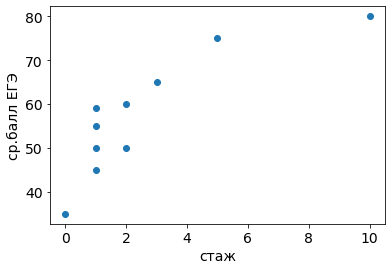

In [6]:
plt.scatter(X[:,1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

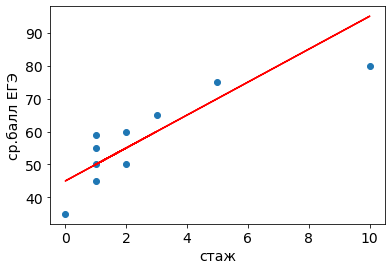

In [7]:
# y = m * x + b
m = 5
b = 45
plt.scatter(X[:,1], y);
plt.plot(X[:,1],  m * X[:,1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [8]:
y_pred1 = 45 + 5 * X[:,1] 
y_pred2 = 40 + 7 * X[:,1]

In [9]:
y_pred1

array([50, 50, 55, 50, 60, 45, 70, 95, 50, 55])

In [10]:
y_pred2

array([ 47,  47,  54,  47,  61,  40,  75, 110,  47,  54])

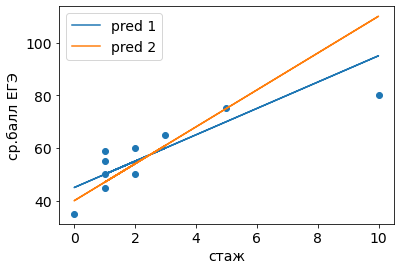

In [11]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_pred1, label='pred 1')
plt.plot(X[:,1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [12]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(-0.6, -0.8)

In [13]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(6.4, 7.4)

In [14]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(55.6, 121.4)

In [15]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
rmse_1, rmse_2

(7.4565407529228995, 11.018166816671457)

In [16]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [17]:
X.T

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [18]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([47.23214286,  3.91071429])

In [19]:
w_ = [40, 5]
print(X @ w_)
print(np.dot(w_, X.T))
print(np.dot(X, w_))
print(w_[0] * X[:,0] + w_[1] * X[:,1])
print(np.sum(w_ * X, axis=1))

[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]


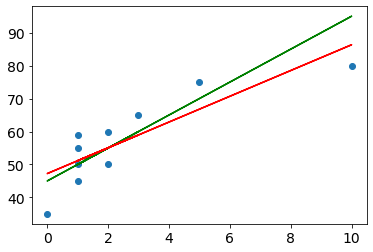

In [20]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45 + X[:,1] * 5, color='g')
plt.plot(X[:,1], w[0] + w[1] * X[:,1], color='red');

In [21]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [22]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(6.4, 55.6)

In [23]:
y_pred3 = w[0] * X[:,0] + w[1] * X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142856, 45.937499999999986)

1. Проведите небольшое исследование алгоритма градиентного спуска на данных из урока. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

Если скорость обучения установлена,слишком маленькой, каждое обновление происходит очень медленно, и для достижения предельного значения требуется много итераций.
Если скорость обучения установлена,слишком большой, это приведет к пропуску оптимального решения.

In [25]:
n = 10
eta = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X.T * (np.sum(w * X, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y))
w, w - eta * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

In [46]:
n = X.shape[0]
eta = 1e-1
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [12.02 34.5 ] 3173.15
100 [1.21092169e+31 6.55765787e+31] 1.6499598531554106e+64
200 [3.40912000e+61 1.84618401e+62] 1.3077533388173627e+125
300 [9.59772979e+91 5.19758039e+92] 1.0365214595478304e+186
400 [2.70205851e+122 1.46328003e+123] 8.215438678021257e+246
500 [7.60713247e+152 4.11958697e+153] inf
600 [2.14164365e+183 1.15979146e+184] inf
700 [6.02939088e+213 3.26517254e+214] inf
800 [1.69746047e+244 9.19247307e+244] inf
900 [4.77887752e+274 2.58796618e+275] inf
1000 [1.34540219e+305 7.28592718e+305] inf


<ipython-input-21-421974dc77a9>:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)


в данном примере скорость обучения была слишком большой поэтому произошла ошибка мы скорее всего перескочили оптимальную точку, при изменении количества иттераций в меньшую сторону результата не дало

In [29]:
n = X.shape[0]
eta = 1e-2
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864


In [50]:
n = X.shape[0]
eta = 1e-2
iterations = 2001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
       w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864
1100 [47.23169965  3.91079613] 45.93750010783411
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.937500000203784
1500 [47.23213608  3.91071554] 45.937500000025196
1600 [47.23214048  3.91071473] 45.93750000000313
1700 [47.23214202  3.91071444] 45.93750000000038
1800 [47.23214256  3.91071434] 45.93750000000003
1900 [47.23214275  3.9107143 ] 45.937500000000014
2000 [47.23214282  3.91071429] 45.937500000000

В данном примере скорость обучения подобрана оптимально, но для улучшения результата необходимо увеличить количество иттераций

In [51]:
n = X.shape[0]
eta = 1e-2
iterations = 3001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
       w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864
1100 [47.23169965  3.91079613] 45.93750010783411
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.937500000203784
1500 [47.23213608  3.91071554] 45.937500000025196
1600 [47.23214048  3.91071473] 45.93750000000313
1700 [47.23214202  3.91071444] 45.93750000000038
1800 [47.23214256  3.91071434] 45.93750000000003
1900 [47.23214275  3.9107143 ] 45.937500000000014
2000 [47.23214282  3.91071429] 45.937500000000

При увеличении количества иттераций удалось добиться правильного ответа. Т.е. оптимального значения скорости обучения и количества иттераций 

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [49]:
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y)))) # ошибка!. Исправлено!
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219864
1100 [47.23169965  3.91079613] 45.93750010783411
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.937500000203784
1500 [47.23213608  3.91071554] 45.937500000025196
1600 [47.23214048  3.91071473] 45.93750000000313
1700 [47.23214202  3.91071444] 45.93750000000038
1800 [47.23214256  3.91071434] 45.93750000000003
1900 [47.23214275  3.9107143 ] 45.937500000000014
2000 [47.23214282  3.91071429] 45.937500000000

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога.

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере  diff=10−6 , а значение  𝜂=10−2 ?

In [53]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2